In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data loading and preprocessing

In [14]:
# Load the CSV file
df = pd.read_csv('Dataset/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv')

# Show information about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41470 entries, 0 to 41469
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Site               41470 non-null  object 
 1   Parameter          41470 non-null  object 
 2   Date (LT)          41470 non-null  object 
 3   Year               41470 non-null  int64  
 4   Month              41470 non-null  int64  
 5   Day                41470 non-null  int64  
 6   Hour               41470 non-null  int64  
 7   NowCast Conc.      41470 non-null  float64
 8   AQI                41470 non-null  int64  
 9   AQI Category       41470 non-null  object 
 10  Raw Conc.          41470 non-null  float64
 11  Conc. Unit         41470 non-null  object 
 12  Duration           41470 non-null  object 
 13  QC Name            41470 non-null  object 
 14  pomocna            41469 non-null  object 
 15  diskretno_vrijeme  41470 non-null  int64  
dtypes: float64(2), int64(6

In [15]:
print(df.head(5))
print(df.tail(5))

       Site          Parameter        Date (LT)  Year  Month  Day  Hour  \
0  Sarajevo  PM2.5 - Principal  5/22/2018 17:00  2018      5   22    17   
1  Sarajevo  PM2.5 - Principal  5/22/2018 18:00  2018      5   22    18   
2  Sarajevo  PM2.5 - Principal  5/22/2018 19:00  2018      5   22    19   
3  Sarajevo  PM2.5 - Principal  5/22/2018 20:00  2018      5   22    20   
4  Sarajevo  PM2.5 - Principal  5/22/2018 21:00  2018      5   22    21   

   NowCast Conc.  AQI AQI Category  Raw Conc. Conc. Unit Duration QC Name  \
0           10.0   42         Good        7.0      UG/M3     1 Hr   Valid   
1           15.7   59     Moderate       20.0      UG/M3     1 Hr   Valid   
2           14.2   55     Moderate       13.0      UG/M3     1 Hr   Valid   
3           16.7   61     Moderate       19.0      UG/M3     1 Hr   Valid   
4           13.8   55     Moderate       11.0      UG/M3     1 Hr   Valid   

           pomocna  diskretno_vrijeme  
0              NaN                  0  
1  5/2

In [16]:
# rename columns Date (LT) to DateTime and Raw Conc. to RawConc
df.rename(columns={'Date (LT)': 'DateTime', 'Raw Conc.': 'RawConc'}, inplace=True)
# convert DateTime column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [17]:
# extract date, and raw conc into a new dataframe
df_raw_conc = df[['DateTime', 'RawConc']].copy()
# extract date, and AQI into a new dataframe
df_aqi = df[['DateTime', 'AQI']].copy()

In [5]:
# function that groups data by day and returns number of rows for each day, dates where this sum is <24
def number_of_measures_per_day(df):
    df = df.copy()
    df = df.groupby(df['DateTime'].dt.date).count()
    daily_measures = df[df['DateTime'] < 24]
    return daily_measures

In [8]:
daily_measures =number_of_measures_per_day(df_aqi)
daily_measures
# We have problem that data is not continuously measured, or it was invalid and was deleted from dataset. What is best approach for this problem, should we use values from those rows instead of deleting them, or should we delete them and use only valid data and do something with these gaps? Even original dataset has gaps, so we can't use it as reference.

,DateTime,AQI
DateTime,,
2018-05-22,7,7
2018-05-30,23,23
2018-06-04,18,18
2018-06-05,23,23
2018-07-05,21,21
...,...,...
2023-04-03,23,23
2023-04-14,20,20
2023-04-19,23,23


<Axes: xlabel='DateTime'>

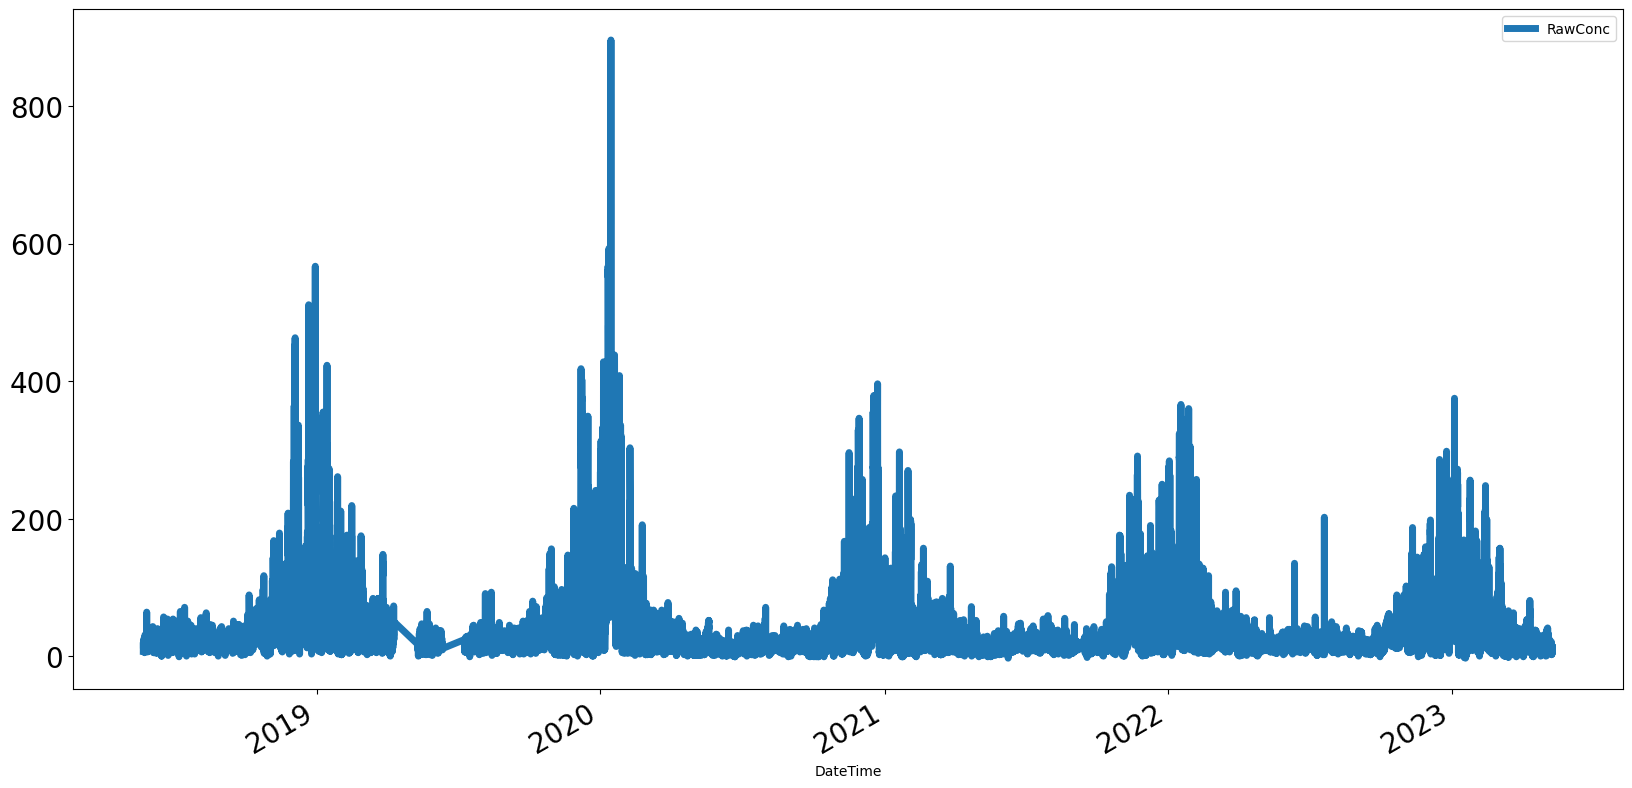

In [8]:
# plot raw conc
df_raw_conc.plot(x='DateTime', y='RawConc', figsize=(20,10), linewidth=1, fontsize=20)

<Axes: xlabel='DateTime'>

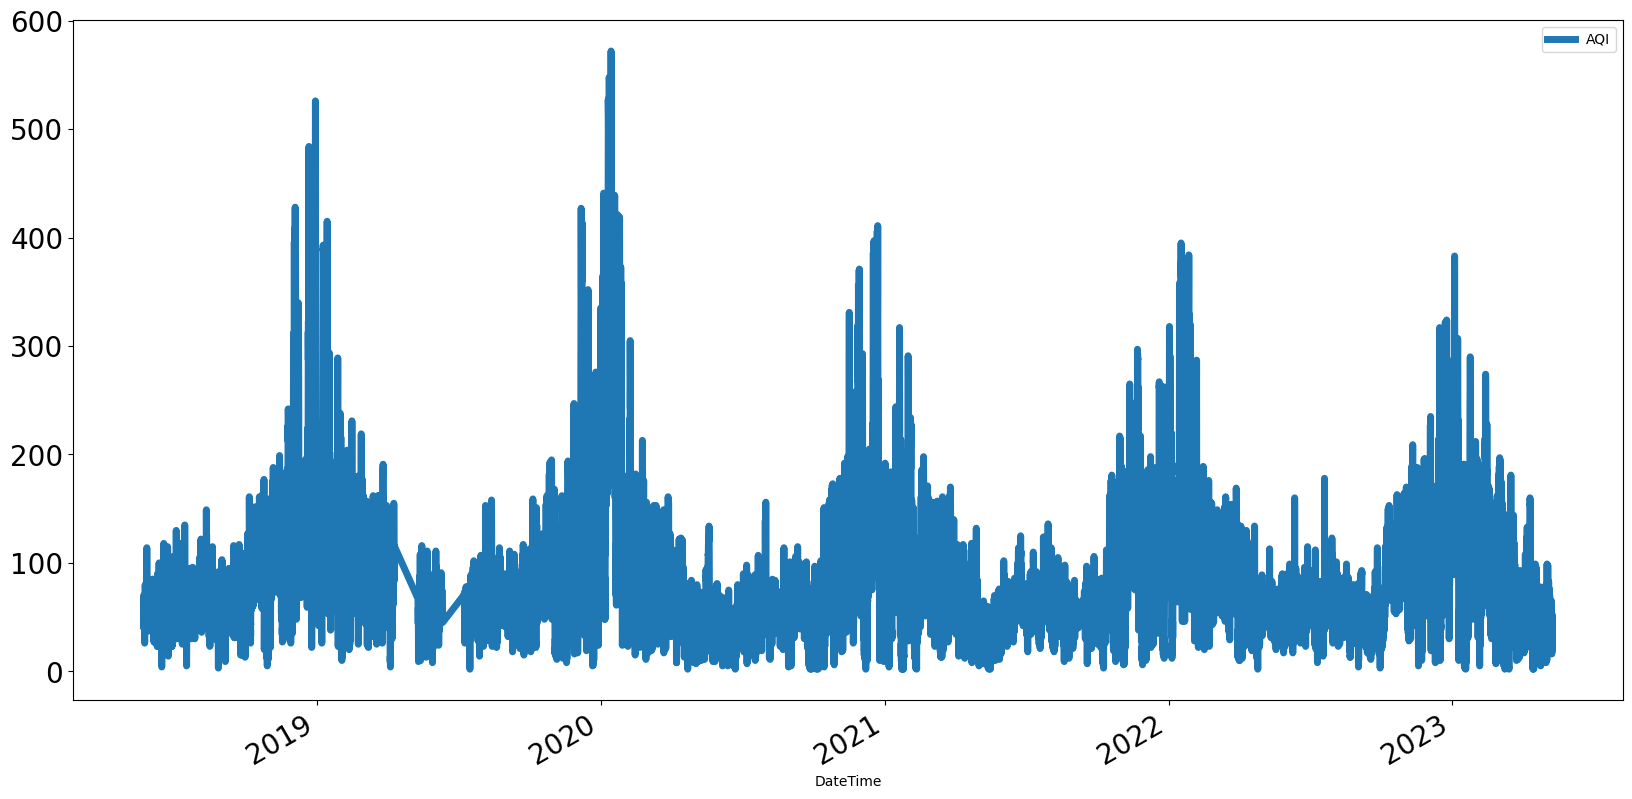

In [9]:
# plot AQI
df_aqi.plot(x='DateTime', y='AQI', figsize=(20,10), linewidth=5, fontsize=20)

In [10]:
def plot_trends(df, date_col, value_col):
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Set the date column as the index
    df.set_index(date_col, inplace=True)
    
    # Resample and compute daily, weekly, monthly, and yearly averages
    daily = df[value_col].resample('D').mean()
    weekly = df[value_col].resample('W').mean()
    monthly = df[value_col].resample('M').mean()
    yearly = df[value_col].resample('Y').mean()
    
    # Plot daily, weekly, monthly, and yearly trends
    plt.figure(figsize=(14, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(daily, label='Daily', color='blue')
    plt.legend()
    
    plt.subplot(4, 1, 2)
    plt.plot(weekly, label='Weekly', color='orange')
    plt.legend()
    
    plt.subplot(4, 1, 3)
    plt.plot(monthly, label='Monthly', color='red')
    plt.legend()
    
    plt.subplot(4, 1, 4)
    plt.plot(yearly, label='Yearly', color='green')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

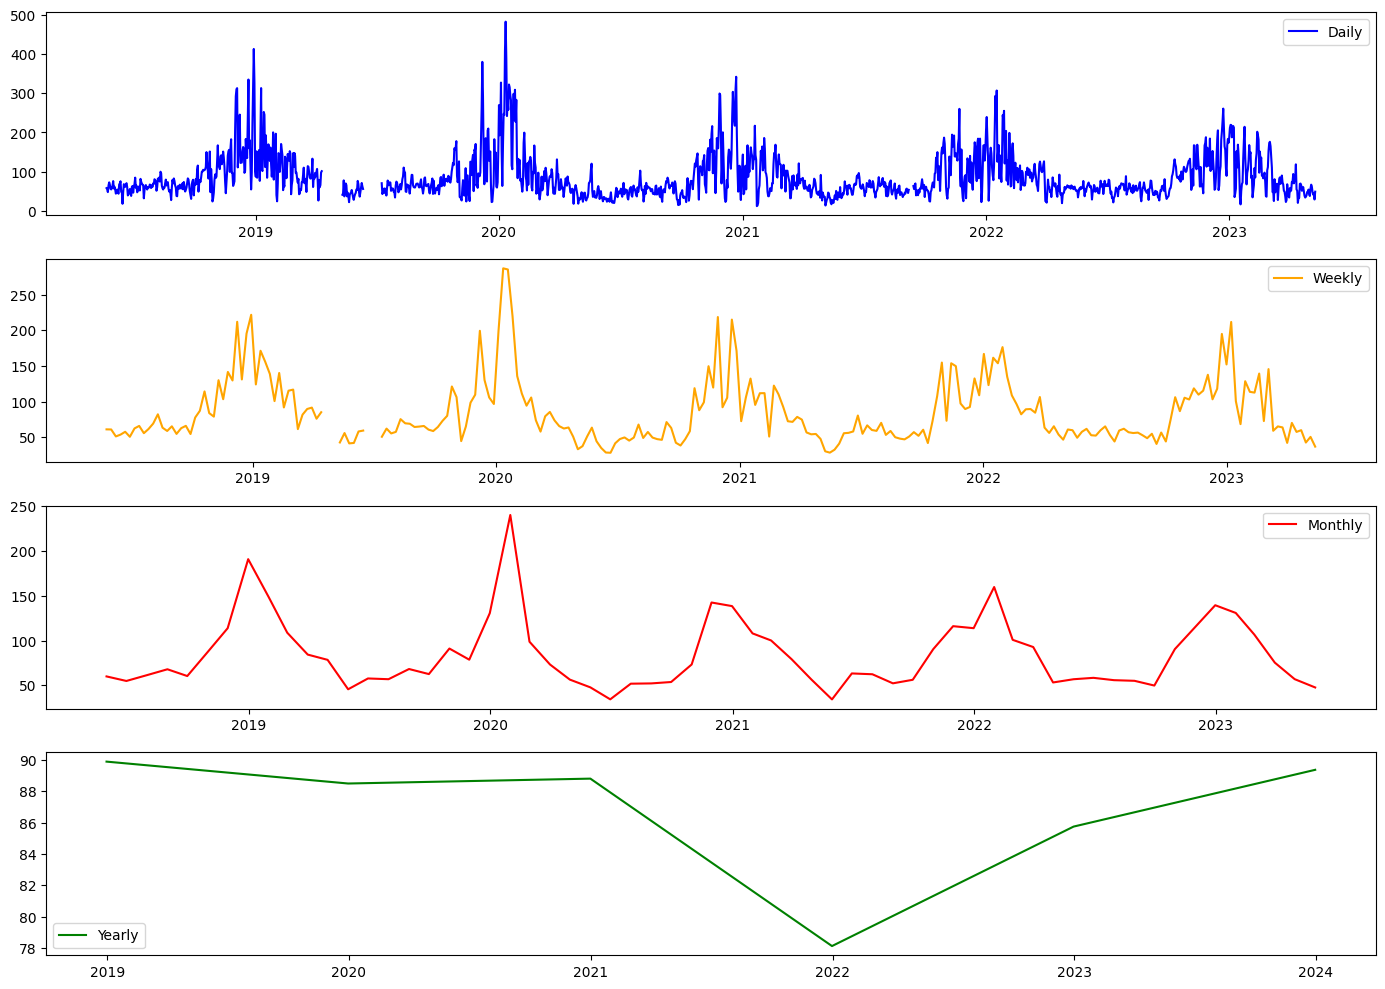

In [11]:
plot_trends(df_aqi.copy(), 'DateTime', 'AQI')
#  Why is the graph not continuous? 

## Potential problem: Some data is missing

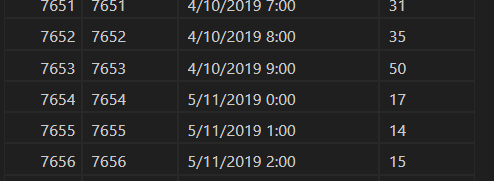
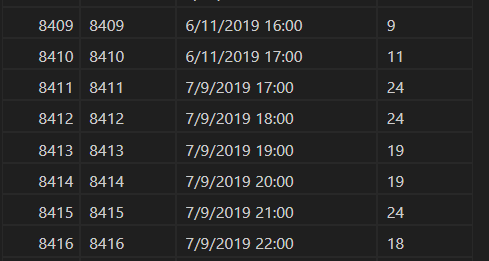

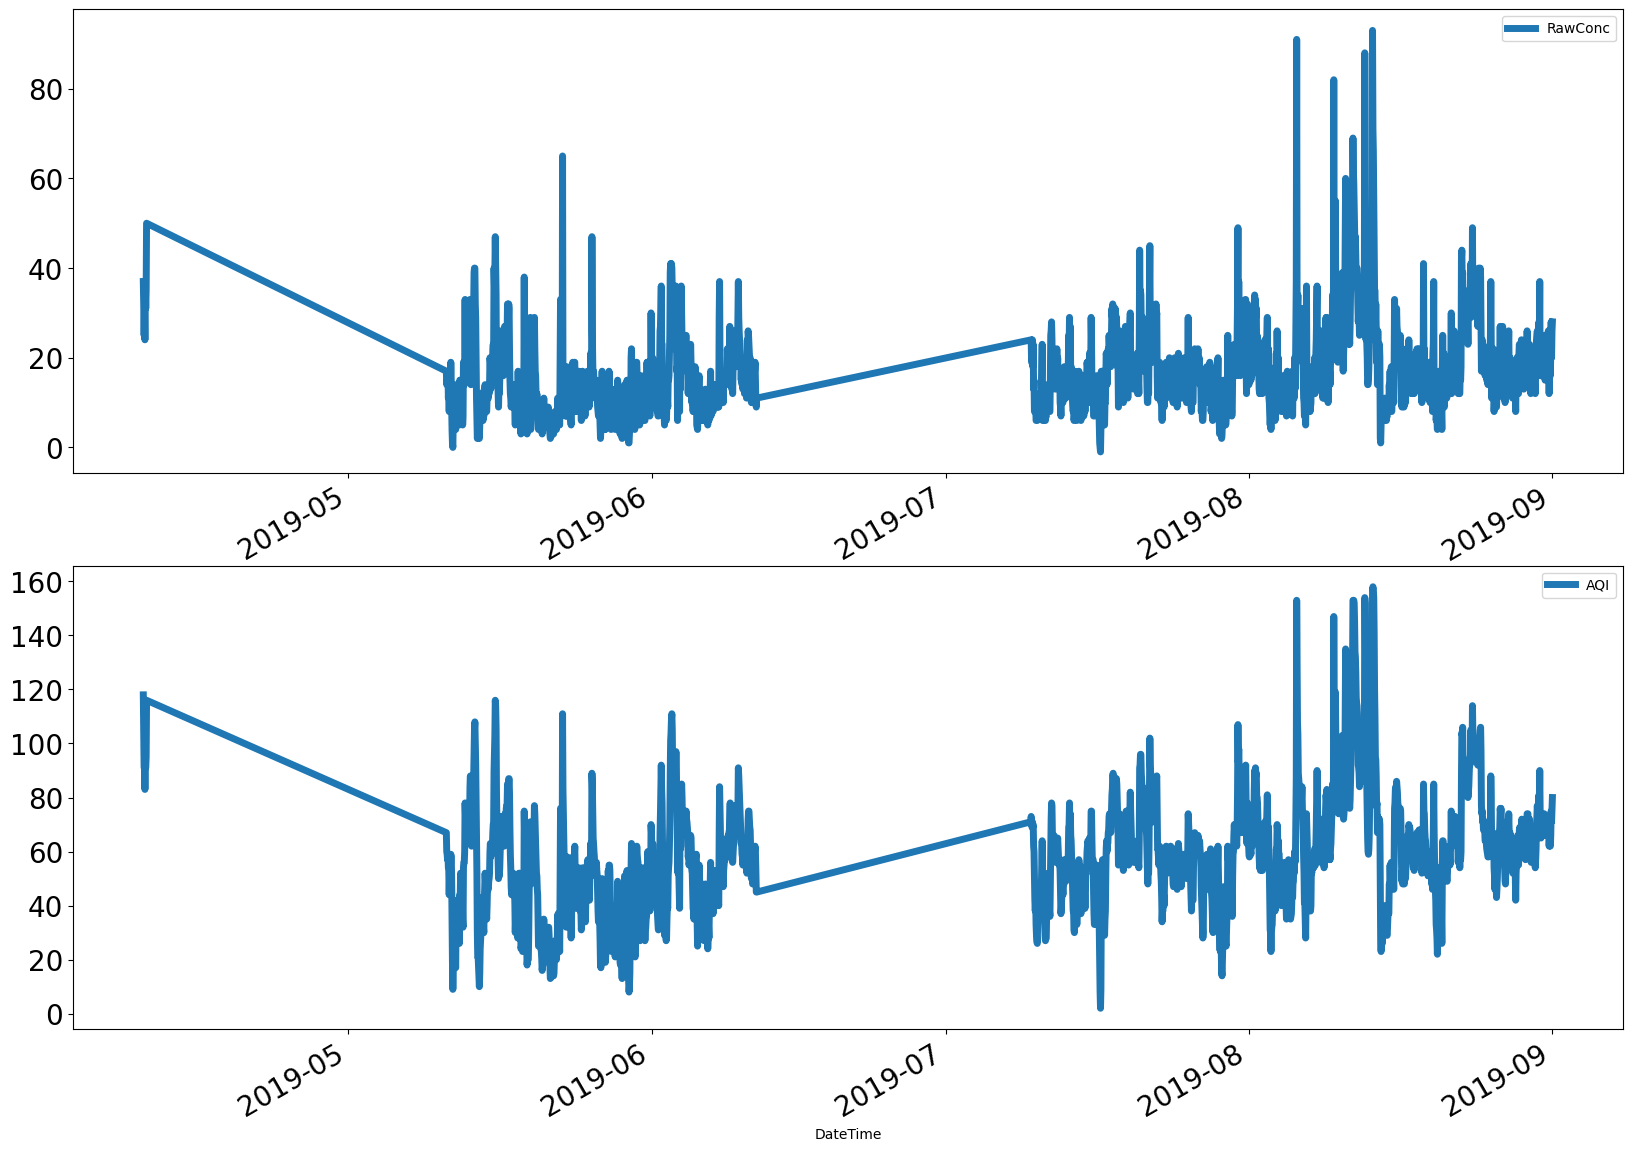

In [12]:
def plot_between(df, start_date, end_date):
    mask = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)
    df = df.loc[mask]
    fig, axes = plt.subplots(2, 1, figsize=(20, 15))
    df.plot(x='DateTime', y='RawConc', ax=axes[0], linewidth=5, fontsize=20)
    df.plot(x='DateTime', y='AQI', ax=axes[1], linewidth=5, fontsize=20)
    plt.show()

plot_between(df, '2019-04-10', '2019-09-01')

# print(copy_df.loc[copy_df['DateTime'] == '2019-04-10 9:00'])
# print(copy_df.loc[copy_df['DateTime'] == '2019-04-10 10:00'])

## Continuation

In [29]:
# train test split: last date in dataset is 5/10/2023 1:00, test is last two weeks training is the rest
def train_test_split(df, date):
    df = df.copy()
    train_data = df[df['DateTime'] < date].copy()
    test_data = df[df['DateTime'] >= date].copy()
    df.DateTime = df.DateTime.dt.strftime('%d/%m/%Y %H:%M')
    return train_data, test_data

def plot_train_test_data(train_data, test_data, date_column, label):
    plt.figure(figsize=(20,10))
    plt.plot(train_data[date_column], train_data[label], color='blue', label='Train Data')
    plt.plot(test_data[date_column], test_data[label], color='orange', label='Test Data')
    plt.xlabel(date_column)
    plt.ylabel(label)
    plt.title(label + ' Train and Test Data')
    plt.legend()
    plt.show()

In [26]:
date = "26/04/2023 01:00" # 14 days before the end of the dataset * 24 hours = 336 hours (rows)
train_data_raw_conc, test_data_raw_conc = train_test_split(df_raw_conc, date)
train_data_aqi, test_data_aqi = train_test_split(df_aqi, date)

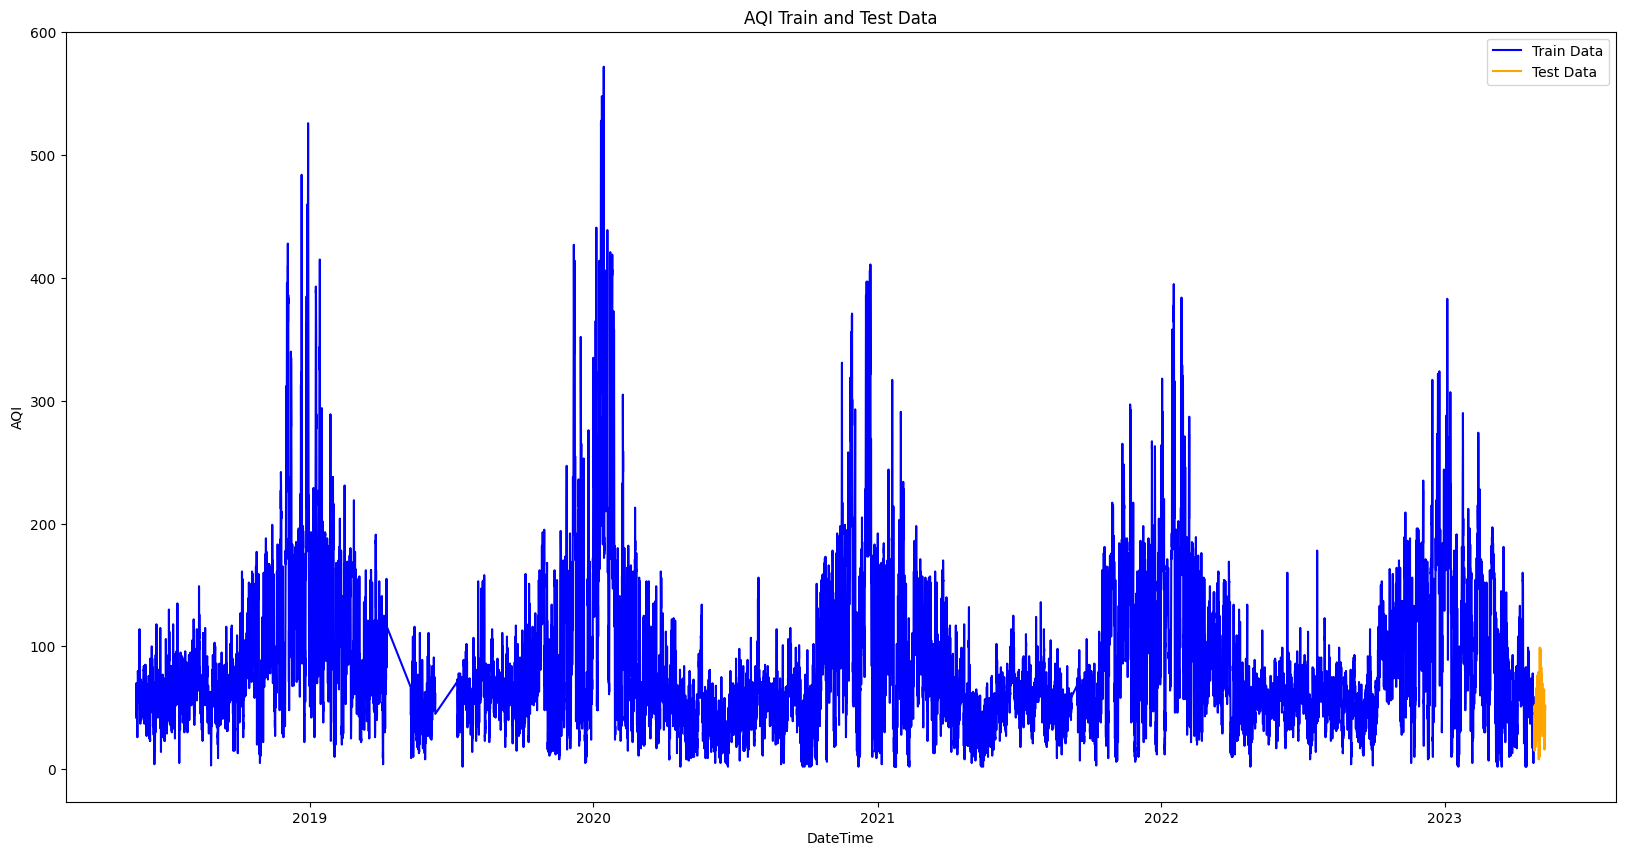

In [15]:
plot_train_test_data(train_data_aqi, test_data_aqi, 'DateTime', 'AQI')


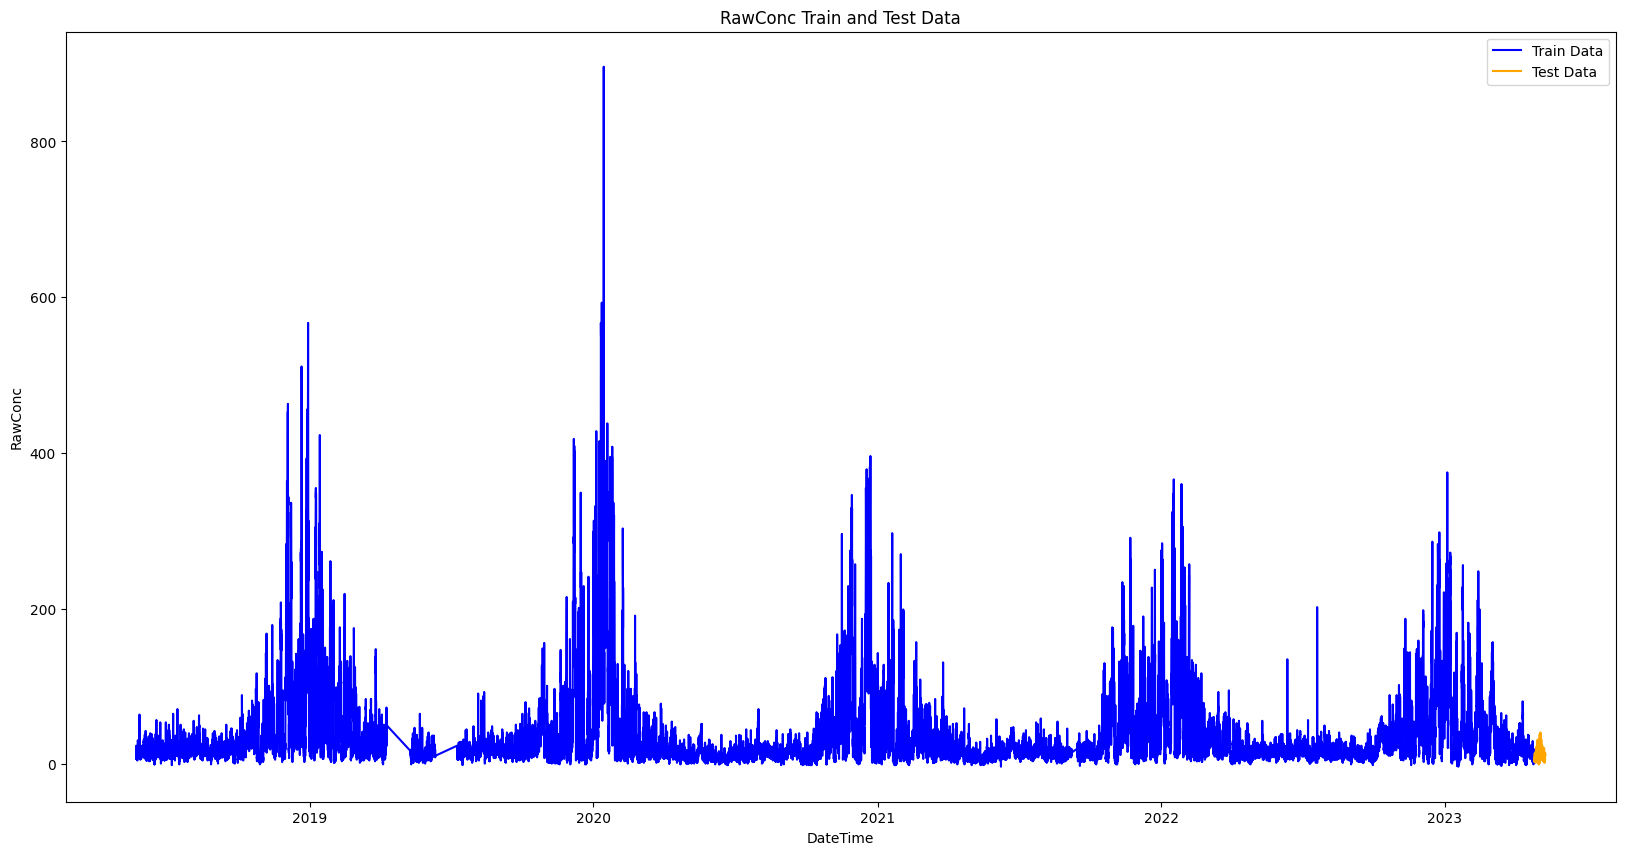

In [16]:
plot_train_test_data(train_data_raw_conc, test_data_raw_conc, 'DateTime', 'RawConc')

# Preparing and saving data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def prepare_extract_date_label(label):
    # Load the CSV file
    df = pd.read_csv('Dataset/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv')
    # rename columns Date (LT) to DateTime and Raw Conc. to RawConc
    df.rename(columns={'Date (LT)': 'DateTime', 'Raw Conc.': 'RawConc'}, inplace=True)
    # convert DateTime column to datetime type
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    return df[['DateTime', label]].copy()

def check_missing_dates(df):    
    # Create a date range from the minimum to maximum date in the dataframe
    date_range = pd.date_range(start=df['DateTime'].min(), end=df['DateTime'].max(), freq='H')
    
    # Get the unique dates in the dataframe
    unique_dates = df['DateTime'].dt.date.unique()
    
    # Find the missing dates by comparing the date range with the unique dates
    missing_dates = [date.date() for date in date_range if date.date() not in unique_dates]
    
    # Return the number of missing dates
    return len(missing_dates)

def add_missing_rows(df):
    df = df.drop_duplicates('DateTime').set_index('DateTime').resample('H').asfreq().reset_index()
    return df


In [2]:
df_aqi = prepare_extract_date_label('AQI')
# copy used later for plotting
df_aqi_copy = df_aqi.copy()
print("Missing dates in AQI: ", check_missing_dates(df_aqi))
df_aqi = add_missing_rows(df_aqi)
print("Missing dates in AQI after adding missing rows: ", check_missing_dates(df_aqi))
print("Number of nan values in AQI: ", df_aqi['AQI'].isnull().sum())

Missing dates in AQI:  1512
Missing dates in AQI after adding missing rows:  0
Number of nan values in AQI:  2057


In [42]:
def fill_missing_with_average(df, label='AQI'):
    """
    Fills missing values in the 'AQI' column of the given DataFrame by taking the average value of the same month and day.

    Parameters:
    df (DataFrame): The DataFrame containing the 'DateTime' and 'AQI' columns.

    Returns:
    DataFrame: The DataFrame with the missing values in the 'AQI' column filled with the average value of the same month and day.
    """
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day

    df[label] = df.groupby(['Month', 'Day'])[label].transform(lambda x: x.fillna(x.mean()))

    df.drop(columns=['Month', 'Day'], inplace=True)
    return df

In [23]:
# df_aqi.AQI = df_aqi.AQI.interpolate(method='linear', limit_direction='both')
# df_aqi.AQI = df_aqi.AQI.interpolate(method='spline', order=3)
df_aqi = fill_missing_with_average(df_aqi)
print("Number of nan values in AQI after filling with average: ", df_aqi['AQI'].isnull().sum())

Number of nan values in AQI after filling with average:  0


In [7]:
def plot_original_and_interpolated_data(df_original, df_interpolated, label):
    fig, axes = plt.subplots(2, 1, figsize=(20, 15))
    df_original.plot(x='DateTime', y=label, ax=axes[0], linewidth=1, fontsize=20, color='orange', label='Original')
    df_interpolated.plot(x='DateTime', y=label, ax=axes[1], linewidth=1, fontsize=20, color='blue', label='Interpolated')
    plt.show()

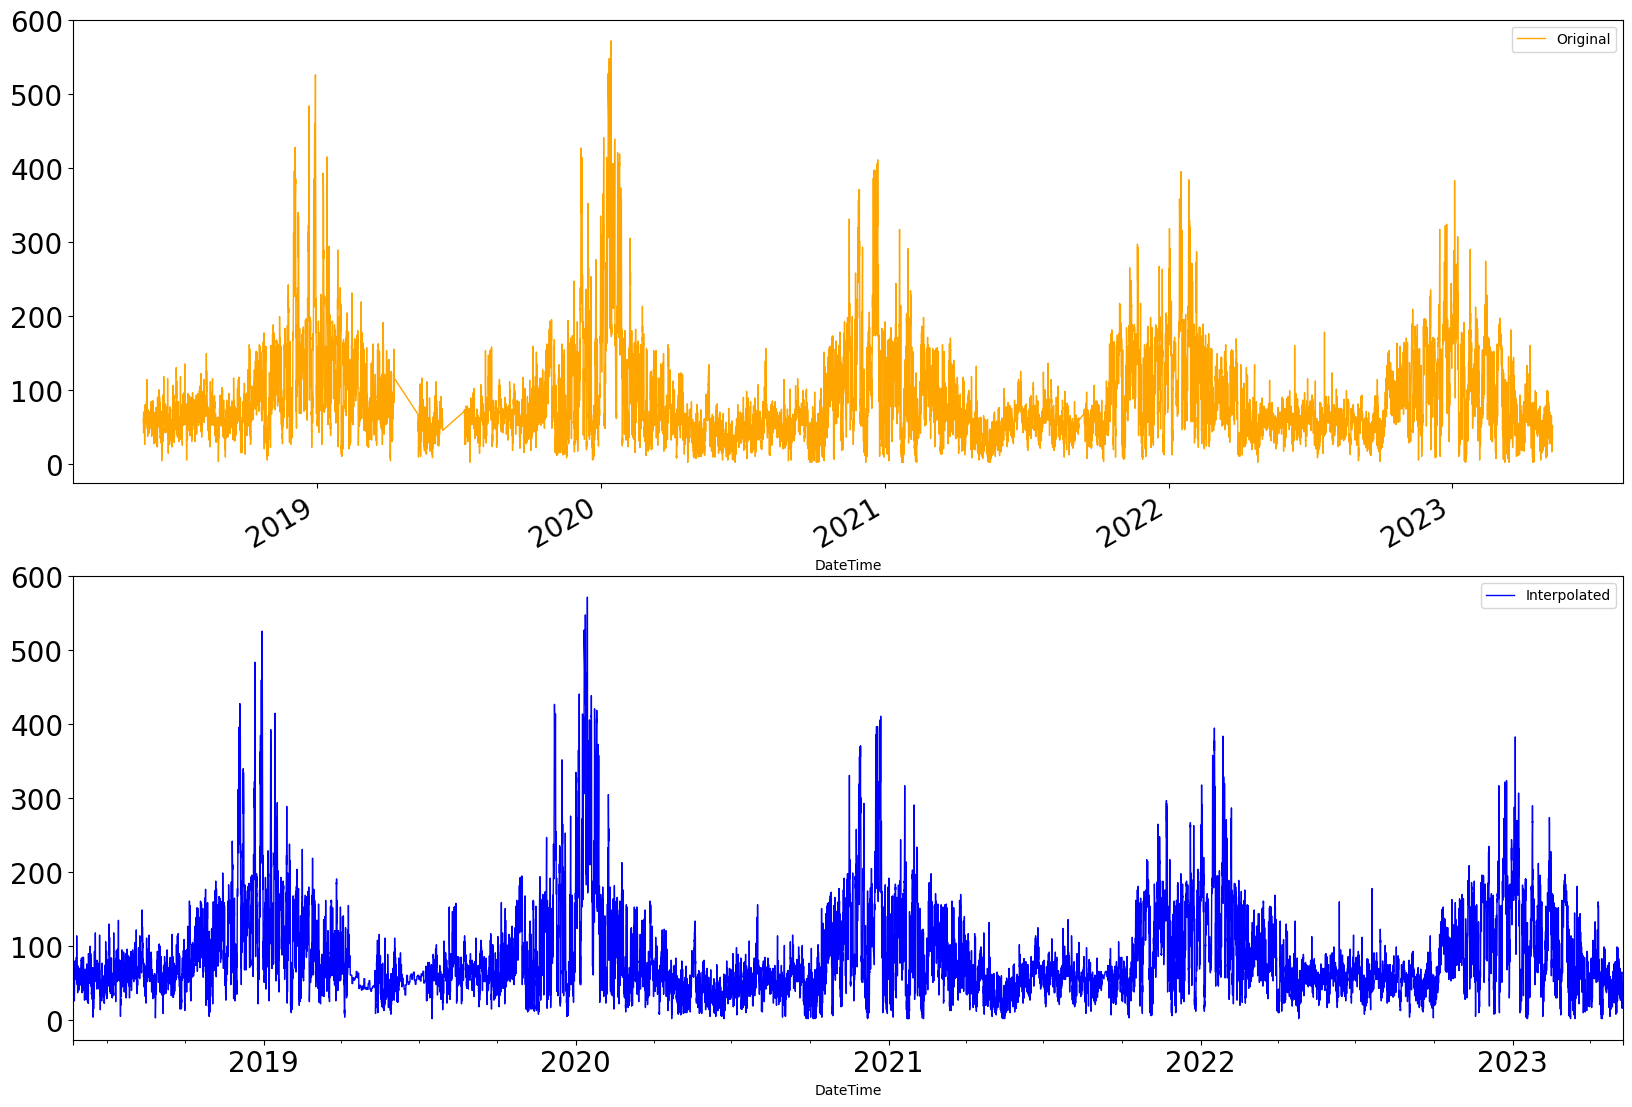

In [24]:
plot_original_and_interpolated_data(df_aqi_copy, df_aqi, 'AQI')

### Test: data imputation with spline

In [5]:
df_aqi_spline = prepare_extract_date_label('AQI')
# copy used later for plotting
df_aqi_spline_copy = df_aqi_spline.copy()
print("Missing dates in AQI: ", check_missing_dates(df_aqi_spline))
df_aqi_spline = add_missing_rows(df_aqi_spline)
print("Missing dates in AQI after adding missing rows: ", check_missing_dates(df_aqi_spline))
print("Number of nan values in AQI: ", df_aqi_spline['AQI'].isnull().sum())

Missing dates in AQI:  1512
Missing dates in AQI after adding missing rows:  0
Number of nan values in AQI:  2057


In [6]:
df_aqi_spline.AQI = df_aqi_spline.AQI.interpolate(method='spline', order=3)
print("Number of nan values in AQI after filling with spline: ", df_aqi_spline['AQI'].isnull().sum())

Number of nan values in AQI after filling with average:  0


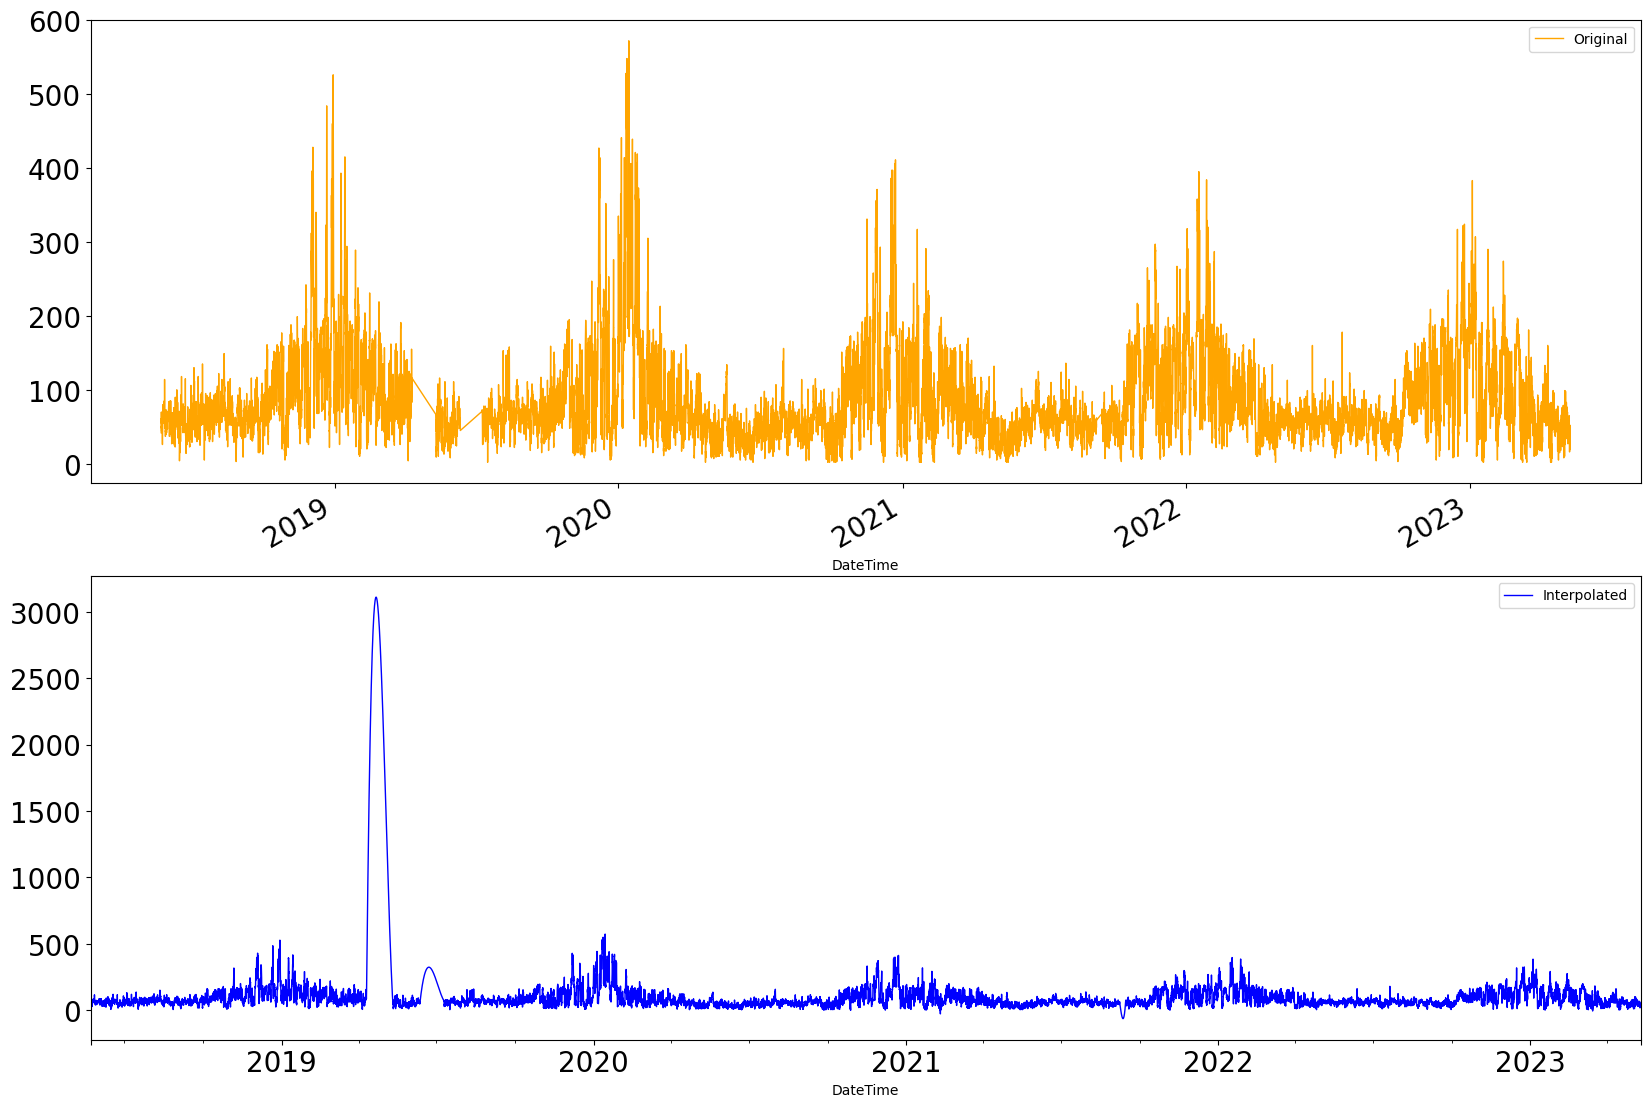

In [7]:
plot_original_and_interpolated_data(df_aqi_spline_copy, df_aqi_spline, 'AQI')
# This is not good

### Data imputation with neighbors

In [3]:
def fill_missing_with_neighbors(df, label='AQI'):
    df.set_index('DateTime', inplace=True)

    # counts number of consecutive missing values and stores start and end date of each sequence in a list
    nan_start_end_dates = df[df[label].isnull()].groupby(df[label].notnull().cumsum()).apply(lambda x: (x.index[0], x.index[-1])).tolist()

    # first fill missing hours if n<24 then fill missing days if n>=24
    for start_date, end_date in nan_start_end_dates:
        # Calculate the number of missing hours between the start and end date +1 because we want to include the end date
        n = (end_date - start_date).total_seconds() / 3600 + 1
        # fill missing hours if n<24
        if n < 24:
            print(f"Filling missing values between {start_date} and {end_date} = number of missing hours: {n}")
            # Select n previous and next n hours
            prev_hours = df.loc[start_date - pd.Timedelta(hours=n) : start_date]
            next_hours = df.loc[end_date : end_date + pd.Timedelta(hours=n)]
            # Calculate mean for this period
            mean_val = pd.concat([prev_hours, next_hours])[label].mean()
            # Fill missing hours with same value
            df.loc[start_date:end_date, label] = mean_val

    for start_date, end_date in nan_start_end_dates:
        n = (end_date - start_date).total_seconds() / 3600 + 1
        # fill missing days if n>=24 by grouping by hour and calculating mean for each hour for n days before and after missing days
        if n >= 24:
            missing_days_number = (end_date - start_date).days + 1
            print(f"Filling missing values between {start_date} and {end_date} = number of missing hours: {n} = number of missing days: {missing_days_number}")
            # take previous and next missing_days_number days grouped by hour and calculate mean for each hour
            prev_days = df.loc[start_date - pd.DateOffset(days=missing_days_number) : start_date]
            next_days = df.loc[end_date : end_date + pd.DateOffset(days=missing_days_number)]
            neighbor_days = pd.concat([prev_days, next_days])
            mean_vals = neighbor_days.groupby(neighbor_days.index.hour)[label].mean()
            # fill missing days with mean values
            df.loc[start_date:end_date, label] = df.loc[start_date:end_date].index.hour.map(mean_vals)

    df.reset_index(inplace=True)

    return df

In [4]:
df_aqi_neighbors = prepare_extract_date_label('AQI')
# copy used later for plotting
df_aqi_neighbors_copy = df_aqi_neighbors.copy()
# all rows with missing values are dropped so there are no missing values in the dataset but there are missing dates
print("Missing dates in AQI: ", check_missing_dates(df_aqi_neighbors))
df_aqi_neighbors = add_missing_rows(df_aqi_neighbors)
print("Missing dates in AQI after adding missing rows: ", check_missing_dates(df_aqi_neighbors))
print("Number of nan values in AQI: ", df_aqi_neighbors['AQI'].isnull().sum())

Missing dates in AQI:  1512
Missing dates in AQI after adding missing rows:  0
Number of nan values in AQI:  2057


In [5]:
df_aqi_neighbors = fill_missing_with_neighbors(df_aqi_neighbors)
print("Number of nan values in dataset after filling with neighbors: ", df_aqi_neighbors['AQI'].isnull().sum())

Filling missing values between 2018-05-30 12:00:00 and 2018-05-30 12:00:00 = number of missing hours: 1.0
Filling missing values between 2018-06-04 11:00:00 and 2018-06-04 13:00:00 = number of missing hours: 3.0
Filling missing values between 2018-06-04 21:00:00 and 2018-06-05 00:00:00 = number of missing hours: 4.0
Filling missing values between 2018-07-05 11:00:00 and 2018-07-05 13:00:00 = number of missing hours: 3.0
Filling missing values between 2018-07-16 00:00:00 and 2018-07-16 04:00:00 = number of missing hours: 5.0
Filling missing values between 2018-07-27 11:00:00 and 2018-07-27 11:00:00 = number of missing hours: 1.0
Filling missing values between 2018-08-31 11:00:00 and 2018-08-31 11:00:00 = number of missing hours: 1.0
Filling missing values between 2018-10-01 10:00:00 and 2018-10-01 13:00:00 = number of missing hours: 4.0
Filling missing values between 2018-10-05 07:00:00 and 2018-10-05 13:00:00 = number of missing hours: 7.0
Filling missing values between 2018-10-22 12:0

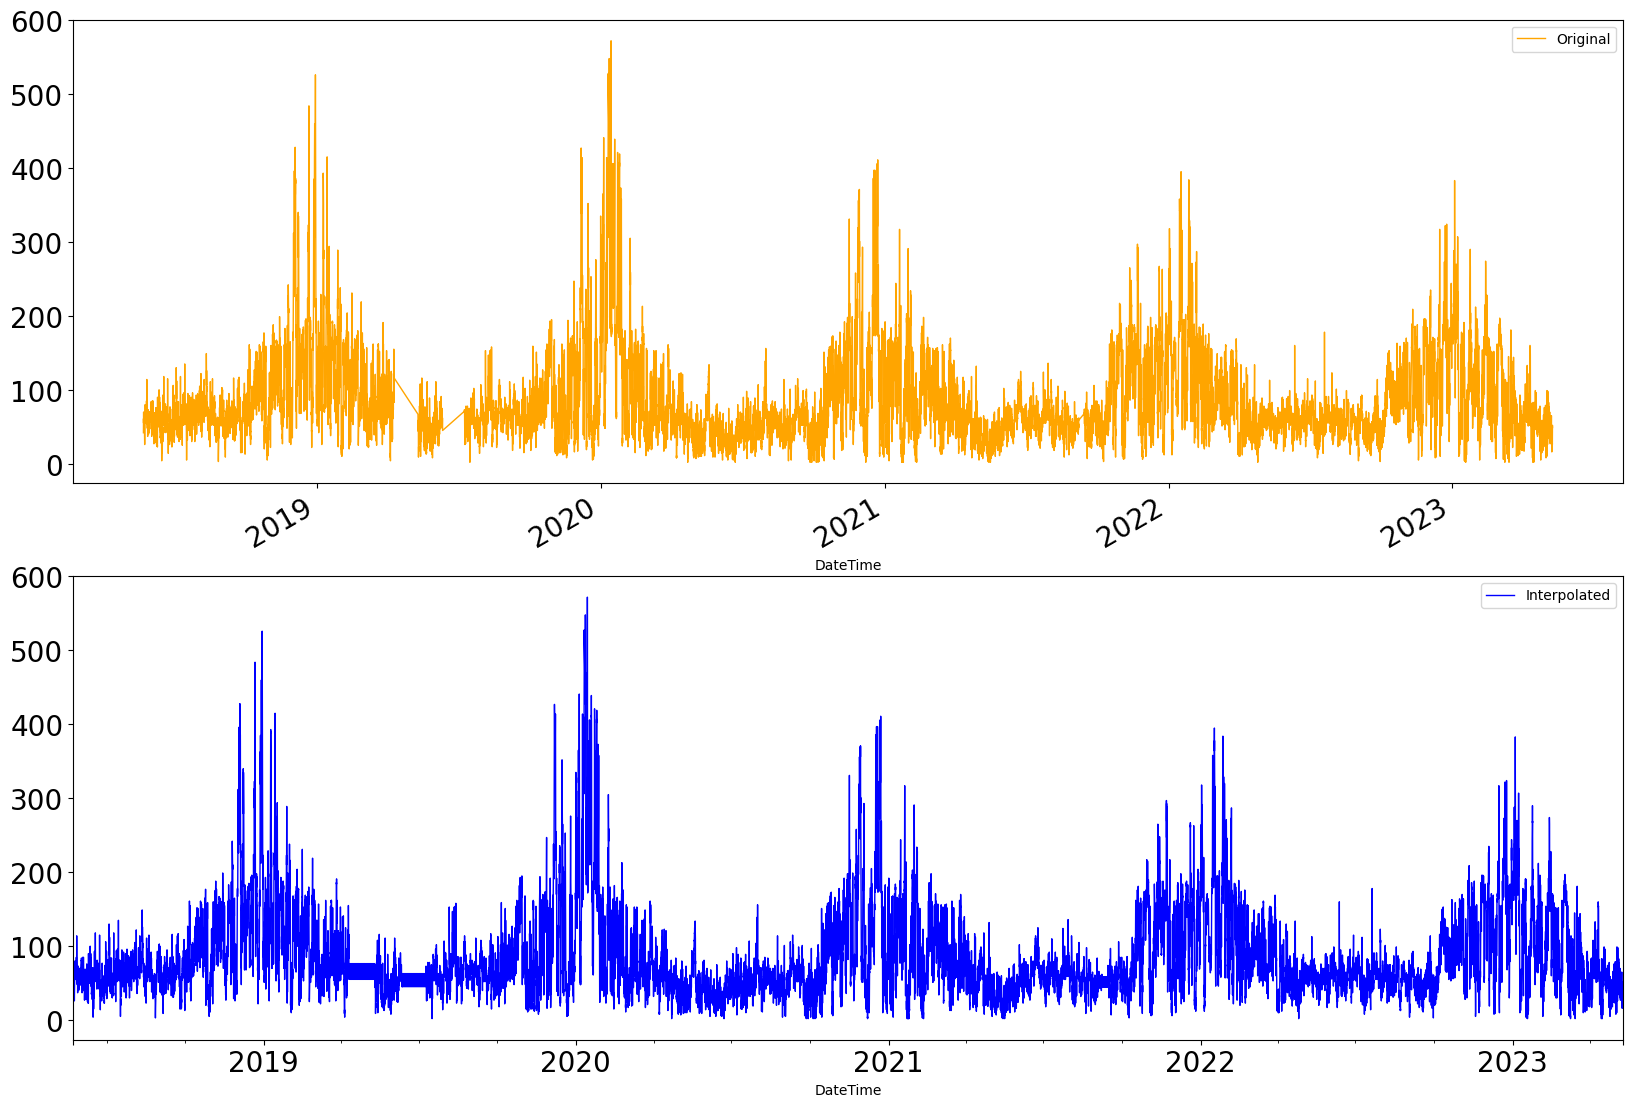

In [8]:
plot_original_and_interpolated_data(df_aqi_neighbors_copy, df_aqi_neighbors, 'AQI')

In [9]:
df_aqi_neighbors.to_csv('Dataset/dataset_aqi_hourly_filled_with_neighbors.csv', index=False)

### Resampling to daily

In [10]:
def resample_data_to_daily(df):
    # df = df.groupby(df['DateTime'].dt.date).mean()
    df = df.set_index('DateTime').resample('1D').mean().reset_index()
    return df

In [52]:
df_aqi_daily = resample_data_to_daily(df_aqi_copy.copy()) 
df_aqi_daily_copy = df_aqi_daily.copy()
print("Missing dates in AQI daily: ", check_missing_dates(df_aqi_daily))
print("Number of nan values in AQI daily: ", df_aqi_daily['AQI'].isnull().sum())
df_aqi_daily = fill_missing_with_average(df_aqi_daily)
print("Number of nan values in AQI daily after filling with average: ", df_aqi_daily['AQI'].isnull().sum())

# version 2: resample data to daily after filling missing values, else there would be lot of missing values
# df_aqi_daily = resample_data_to_daily(df_aqi.copy()) 
# df_aqi_daily_copy = df_aqi_daily.copy()
# print("Missing dates in AQI daily: ", check_missing_dates(df_aqi_daily))
# print("Number of nan values in AQI daily after filling with average: ", df_aqi_daily['AQI'].isnull().sum())


Missing dates in AQI daily:  0
Number of nan values in AQI daily:  63
Number of nan values in AQI daily after filling with average:  0


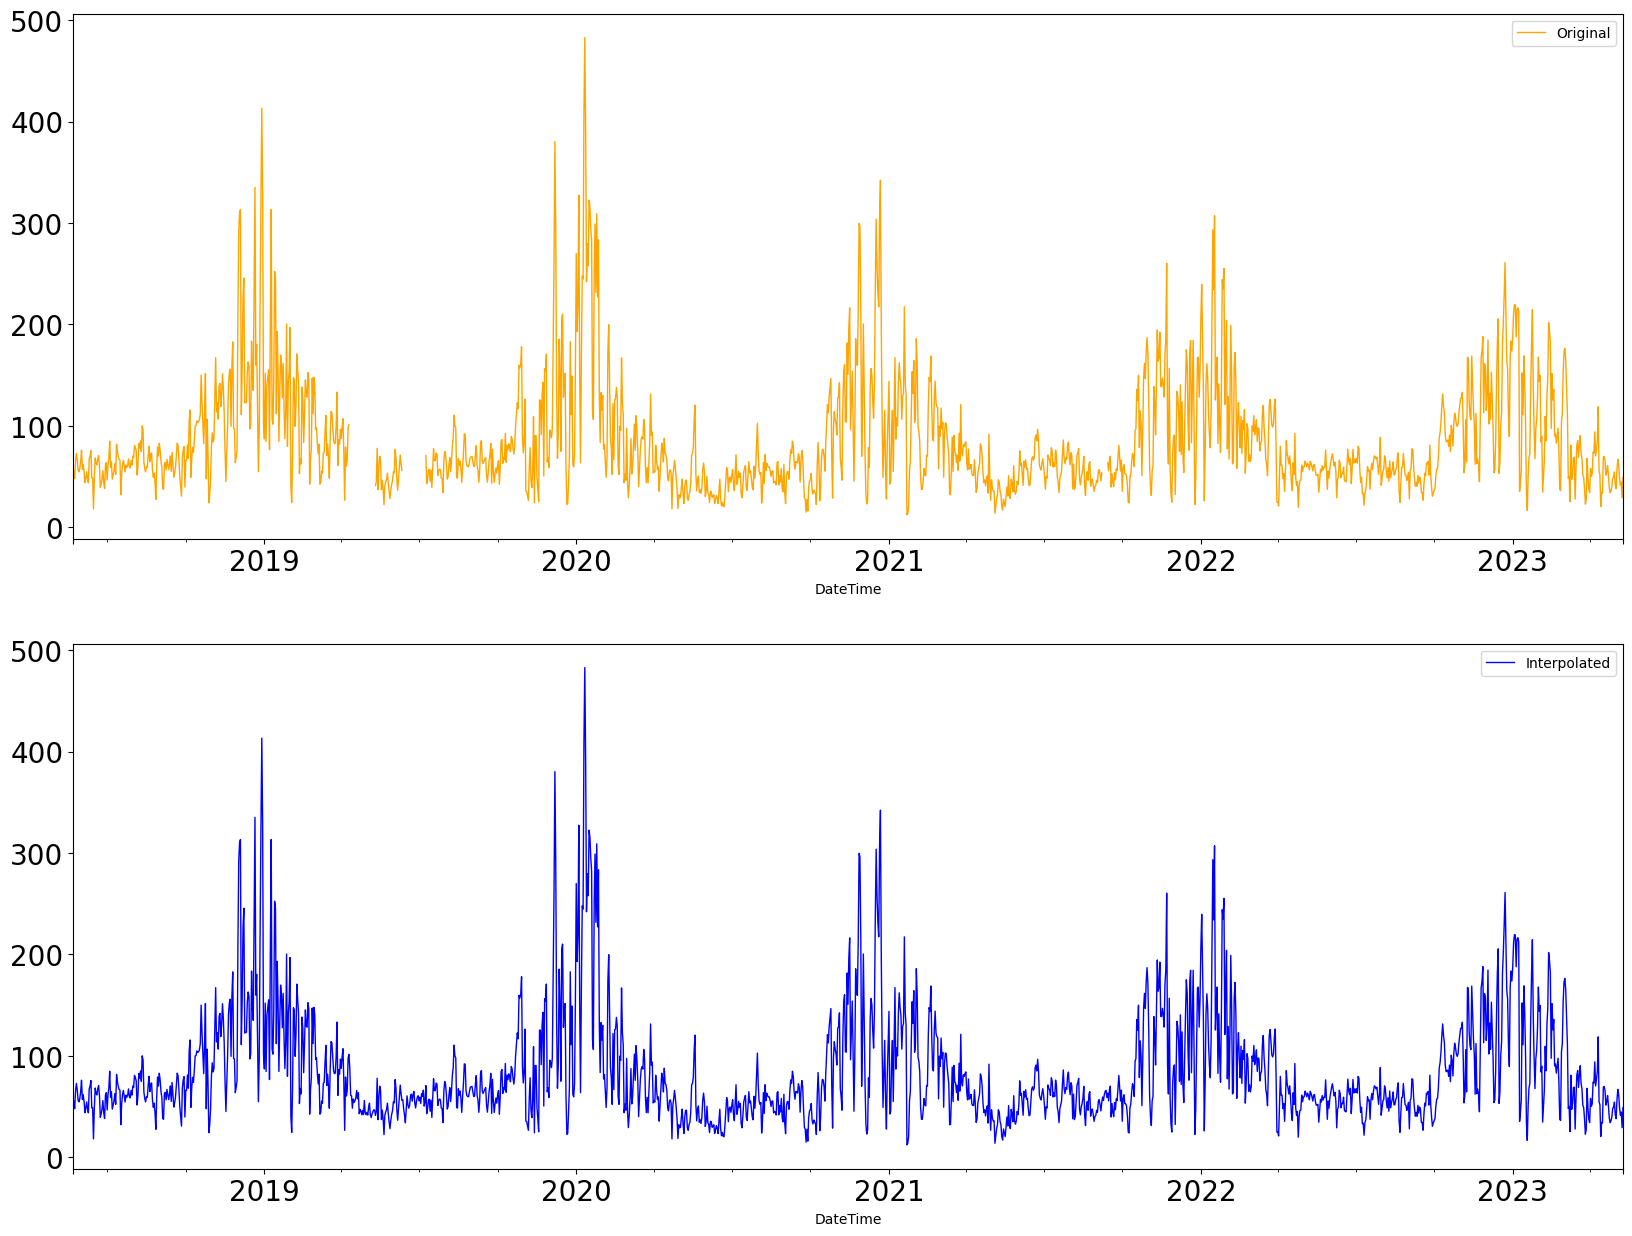

In [53]:
plot_original_and_interpolated_data(df_aqi_daily_copy, df_aqi_daily, 'AQI')

In [54]:
# save to csv
df_aqi.to_csv('Dataset/dataset_aqi_hourly.csv', index=False)
df_aqi_daily.to_csv('Dataset/dataset_aqi_daily.csv', index=False)

In [11]:
def fill_missing_days_with_neighbors(df, label='AQI'):
    df.set_index('DateTime', inplace=True)

    # counts number of consecutive missing values and stores start and end date of each sequence in a list
    nan_start_end_dates = df[df[label].isnull()].groupby(df[label].notnull().cumsum()).apply(lambda x: (x.index[0], x.index[-1])).tolist()

    for start_date, end_date in nan_start_end_dates:
        # Calculate the number of missing days between the start and end date +1 because we want to include the end date
        missing_days_number = (end_date - start_date).days + 1
        print(f"Filling missing values between {start_date} and {end_date} = number of missing days: {missing_days_number}")
        # take previous and next missing_days_number days grouped by day and calculate mean for each hour
        prev_days = df.loc[start_date - pd.DateOffset(days=missing_days_number) : start_date]
        next_days = df.loc[end_date : end_date + pd.DateOffset(days=missing_days_number)]
        neighbor_days = pd.concat([prev_days, next_days])
        mean_val = neighbor_days[label].mean()
        # fill missing days with mean values
        df.loc[start_date:end_date, label] = mean_val  

    df.reset_index(inplace=True)

    return df

In [12]:
df_aqi_daily_neighbors = resample_data_to_daily(df_aqi_copy.copy())
df_aqi_daily_neighbors_copy = df_aqi_daily_neighbors.copy()
print("Missing dates in AQI daily: ", check_missing_dates(df_aqi_daily_neighbors))
print("Number of nan values in AQI daily: ", df_aqi_daily_neighbors['AQI'].isnull().sum())
df_aqi_daily_neighbors = fill_missing_days_with_neighbors(df_aqi_daily_neighbors)
print("Number of nan values in AQI daily after filling with neighbors: ", df_aqi_daily_neighbors['AQI'].isnull().sum())

Missing dates in AQI daily:  0
Number of nan values in AQI daily:  63
Filling missing values between 2019-04-11 00:00:00 and 2019-05-10 00:00:00 = number of missing days: 30
Filling missing values between 2019-06-12 00:00:00 and 2019-07-08 00:00:00 = number of missing days: 27
Filling missing values between 2021-09-08 00:00:00 and 2021-09-13 00:00:00 = number of missing days: 6
Number of nan values in AQI daily after filling with neighbors:  0


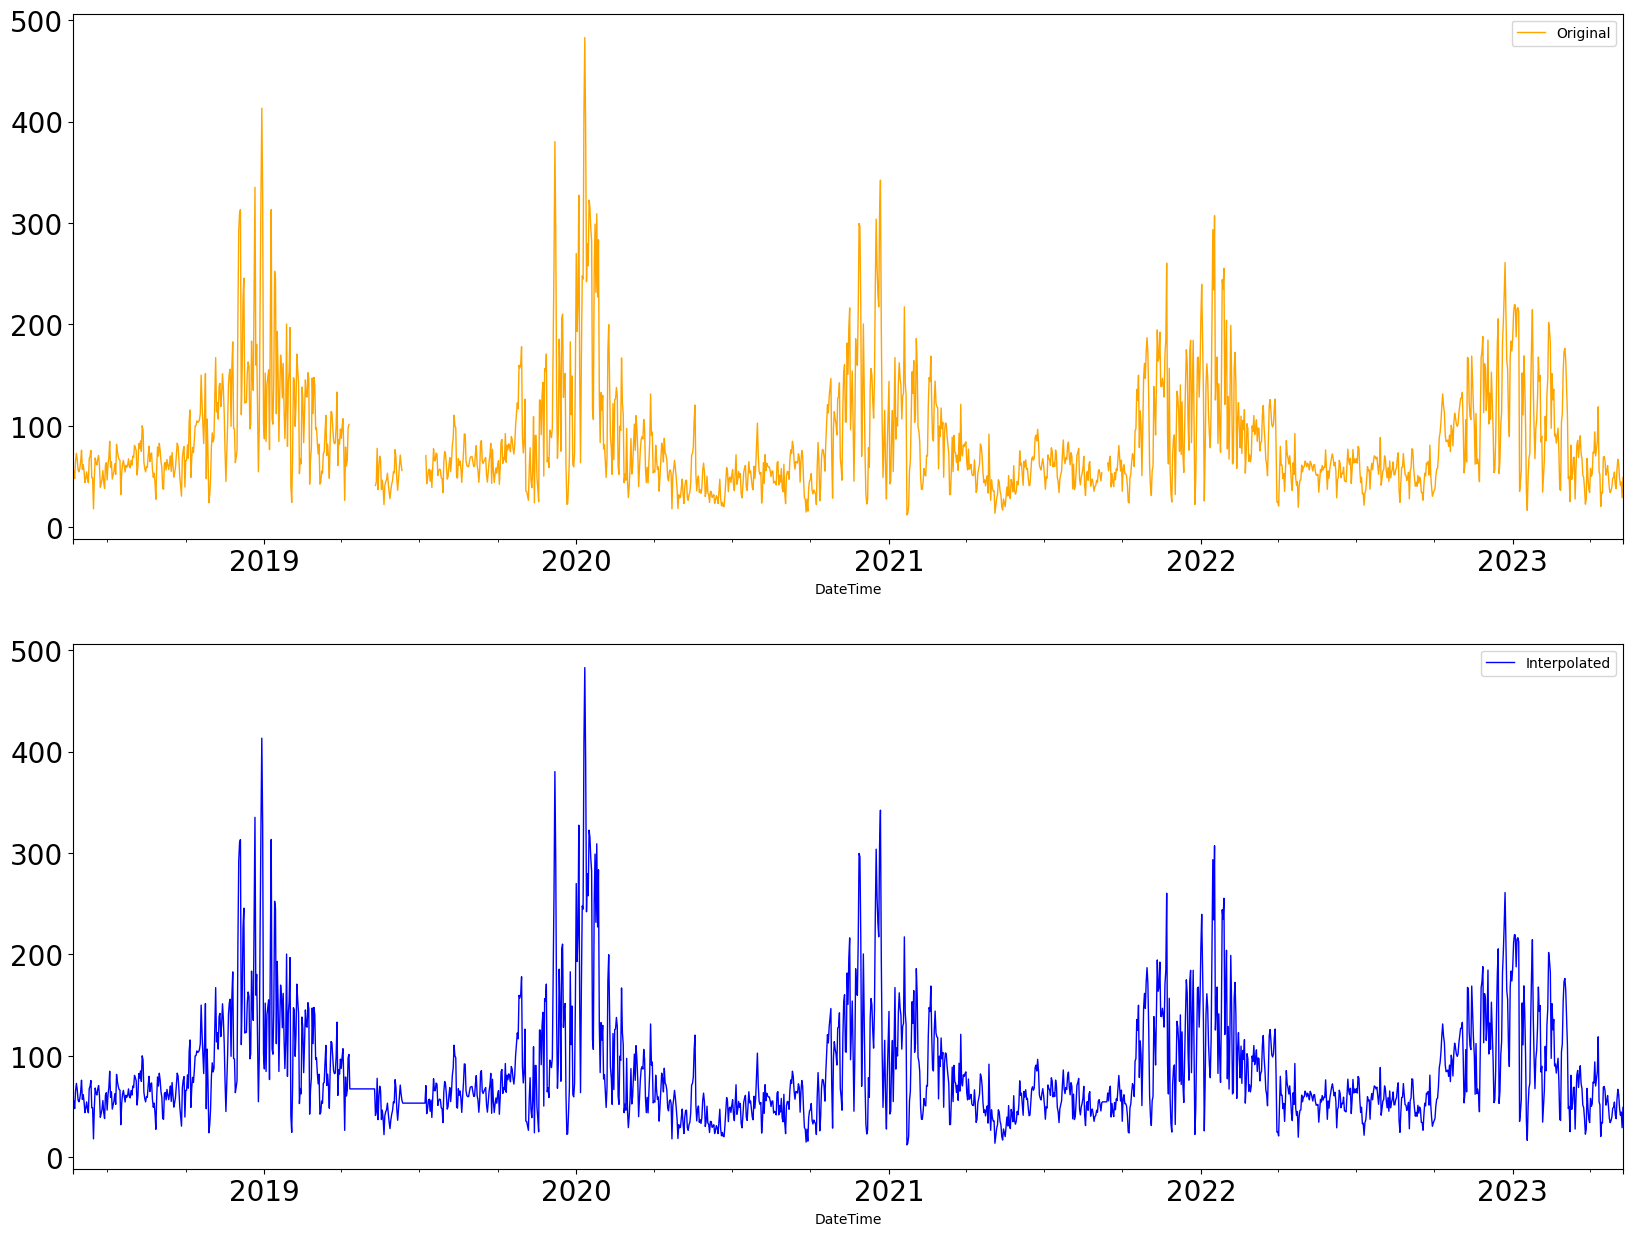

In [39]:
plot_original_and_interpolated_data(df_aqi_daily_neighbors_copy, df_aqi_daily_neighbors, 'AQI')

In [40]:
df_aqi_daily_neighbors.to_csv('Dataset/dataset_aqi_daily_filled_with_neighbors.csv', index=False)

### Doing same for RawConc

In [43]:
df_raw_conc = prepare_extract_date_label('RawConc')
# copy used later for plotting
df_raw_conc_copy = df_raw_conc.copy()
print("Missing dates in RawConc: ", check_missing_dates(df_raw_conc))
df_raw_conc = add_missing_rows(df_raw_conc)
print("Missing dates in RawConc after adding missing rows: ", check_missing_dates(df_raw_conc))
print("Number of nan values in RawConc: ", df_raw_conc['RawConc'].isnull().sum())
df_raw_conc = fill_missing_with_average(df_raw_conc, 'RawConc')
print("Number of nan values in RawConc after filling with average: ", df_raw_conc['RawConc'].isnull().sum())

Missing dates in RawConc:  1512
Missing dates in RawConc after adding missing rows:  0
Number of nan values in RawConc:  2057
Number of nan values in RawConc after filling with average:  0


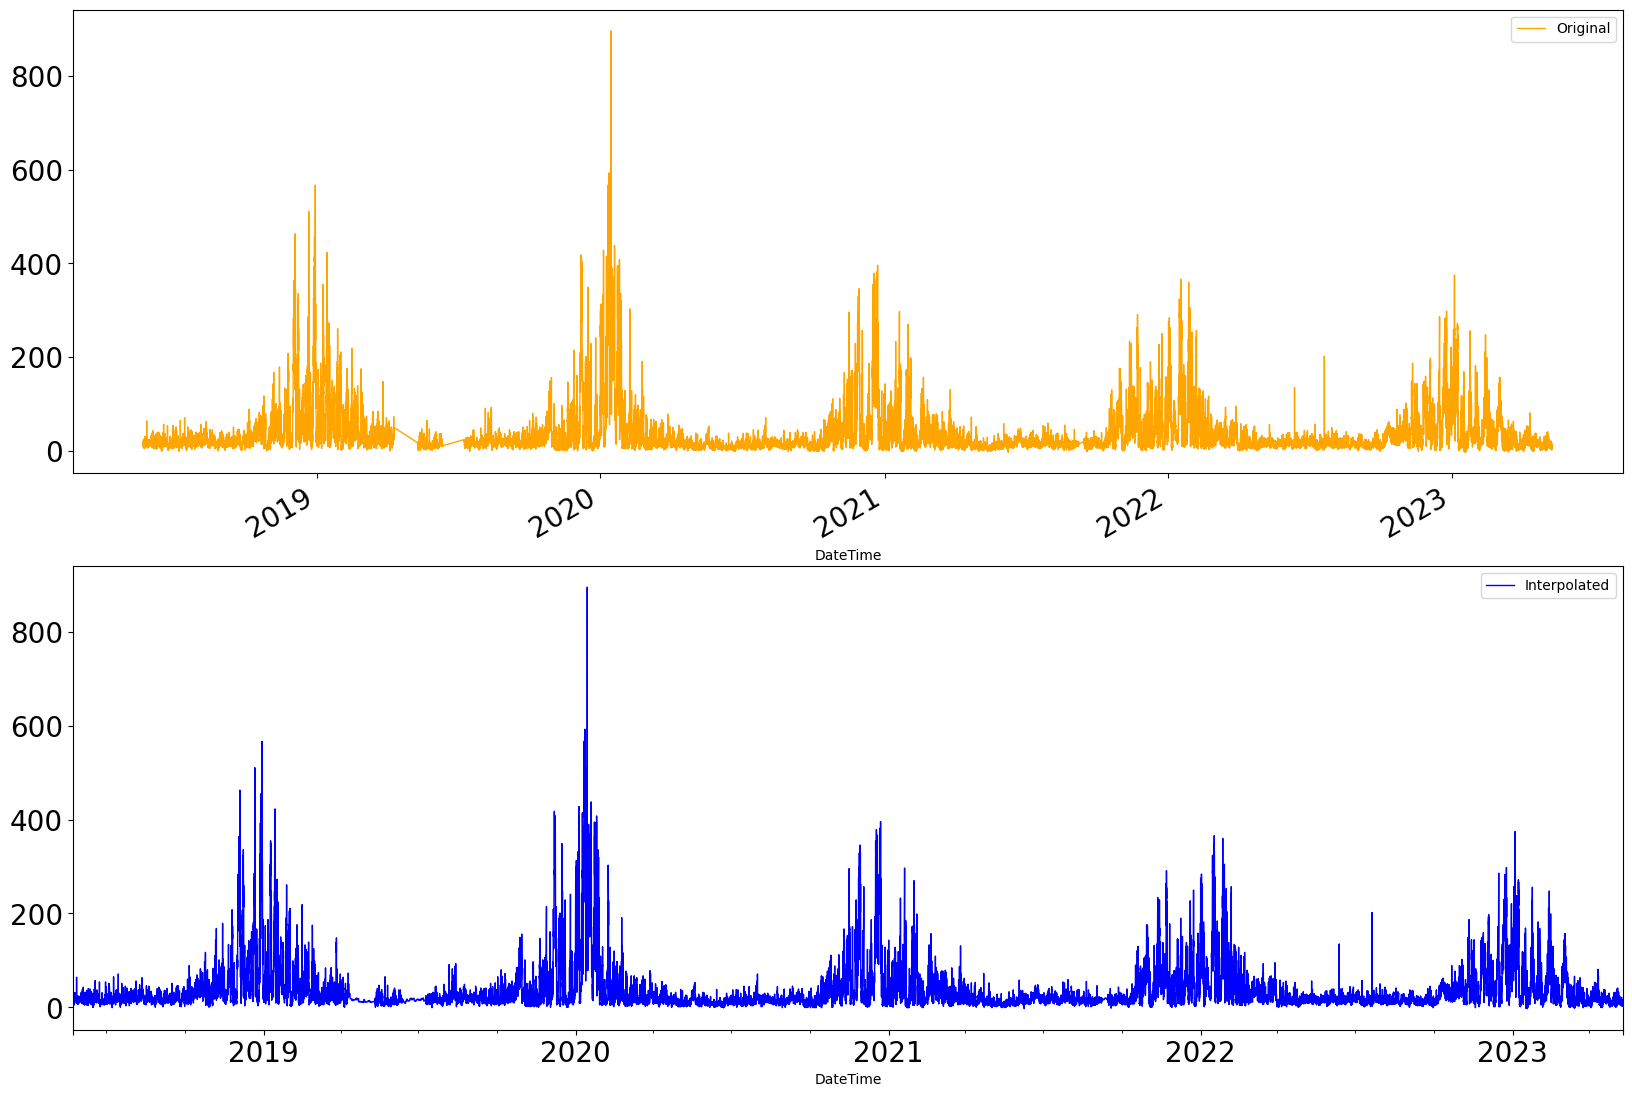

In [59]:
plot_original_and_interpolated_data(df_raw_conc_copy, df_raw_conc, 'RawConc')

In [61]:
df_raw_conc_daily = resample_data_to_daily(df_raw_conc_copy.copy())
df_raw_conc_daily_copy = df_raw_conc_daily.copy()
print("Missing dates in RawConc daily: ", check_missing_dates(df_raw_conc_daily))
print("Number of nan values in RawConc daily: ", df_raw_conc_daily['RawConc'].isnull().sum())
df_raw_conc_daily = fill_missing_with_average(df_raw_conc_daily, 'RawConc')
print("Number of nan values in RawConc daily after filling with average: ", df_raw_conc_daily['RawConc'].isnull().sum())

Missing dates in RawConc daily:  0
Number of nan values in RawConc daily:  63
Number of nan values in RawConc daily after filling with average:  0


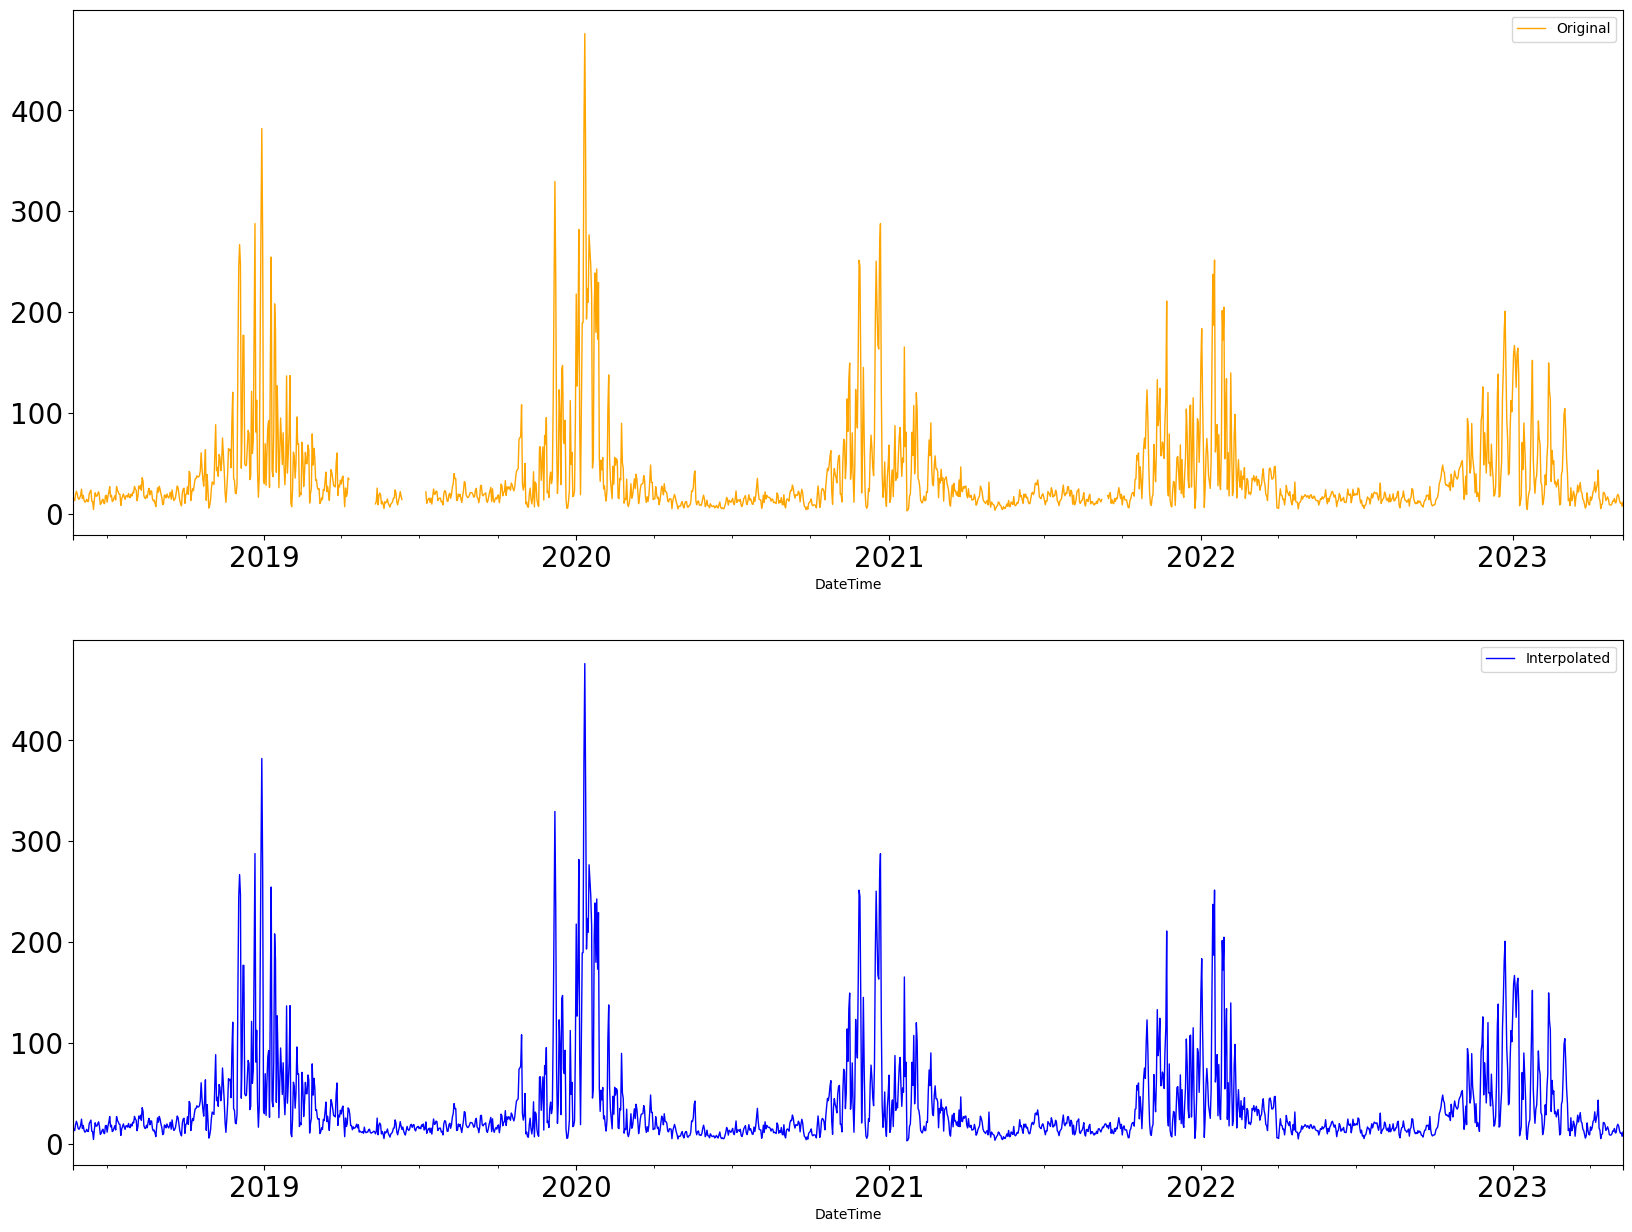

In [62]:
plot_original_and_interpolated_data(df_raw_conc_daily_copy, df_raw_conc_daily, 'RawConc')

In [63]:
# save to csv
df_raw_conc.to_csv('Dataset/dataset_raw_conc_hourly.csv', index=False)
df_raw_conc_daily.to_csv('Dataset/dataset_raw_conc_daily.csv', index=False)

In [13]:
df_raw_conc_hourly_neighbors = prepare_extract_date_label('RawConc')
# copy used later for plotting
df_raw_conc_hourly_neighbors_copy = df_raw_conc_hourly_neighbors.copy()
# all rows with missing values are dropped so there are no missing values in the dataset but there are missing dates
print("Missing dates in RawConc: ", check_missing_dates(df_raw_conc_hourly_neighbors))
df_raw_conc_hourly_neighbors = add_missing_rows(df_raw_conc_hourly_neighbors)
print("Missing dates in RawConc after adding missing rows: ", check_missing_dates(df_raw_conc_hourly_neighbors))
print("Number of nan values in RawConc: ", df_raw_conc_hourly_neighbors['RawConc'].isnull().sum())
df_raw_conc_hourly_neighbors = fill_missing_with_neighbors(df_raw_conc_hourly_neighbors, 'RawConc')
print("Number of nan values in RawConc after filling with neighbors: ", df_raw_conc_hourly_neighbors['RawConc'].isnull().sum())

Missing dates in RawConc:  1512
Missing dates in RawConc after adding missing rows:  0
Number of nan values in RawConc:  2057
Filling missing values between 2018-05-30 12:00:00 and 2018-05-30 12:00:00 = number of missing hours: 1.0
Filling missing values between 2018-06-04 11:00:00 and 2018-06-04 13:00:00 = number of missing hours: 3.0
Filling missing values between 2018-06-04 21:00:00 and 2018-06-05 00:00:00 = number of missing hours: 4.0
Filling missing values between 2018-07-05 11:00:00 and 2018-07-05 13:00:00 = number of missing hours: 3.0
Filling missing values between 2018-07-16 00:00:00 and 2018-07-16 04:00:00 = number of missing hours: 5.0
Filling missing values between 2018-07-27 11:00:00 and 2018-07-27 11:00:00 = number of missing hours: 1.0
Filling missing values between 2018-08-31 11:00:00 and 2018-08-31 11:00:00 = number of missing hours: 1.0
Filling missing values between 2018-10-01 10:00:00 and 2018-10-01 13:00:00 = number of missing hours: 4.0
Filling missing values bet

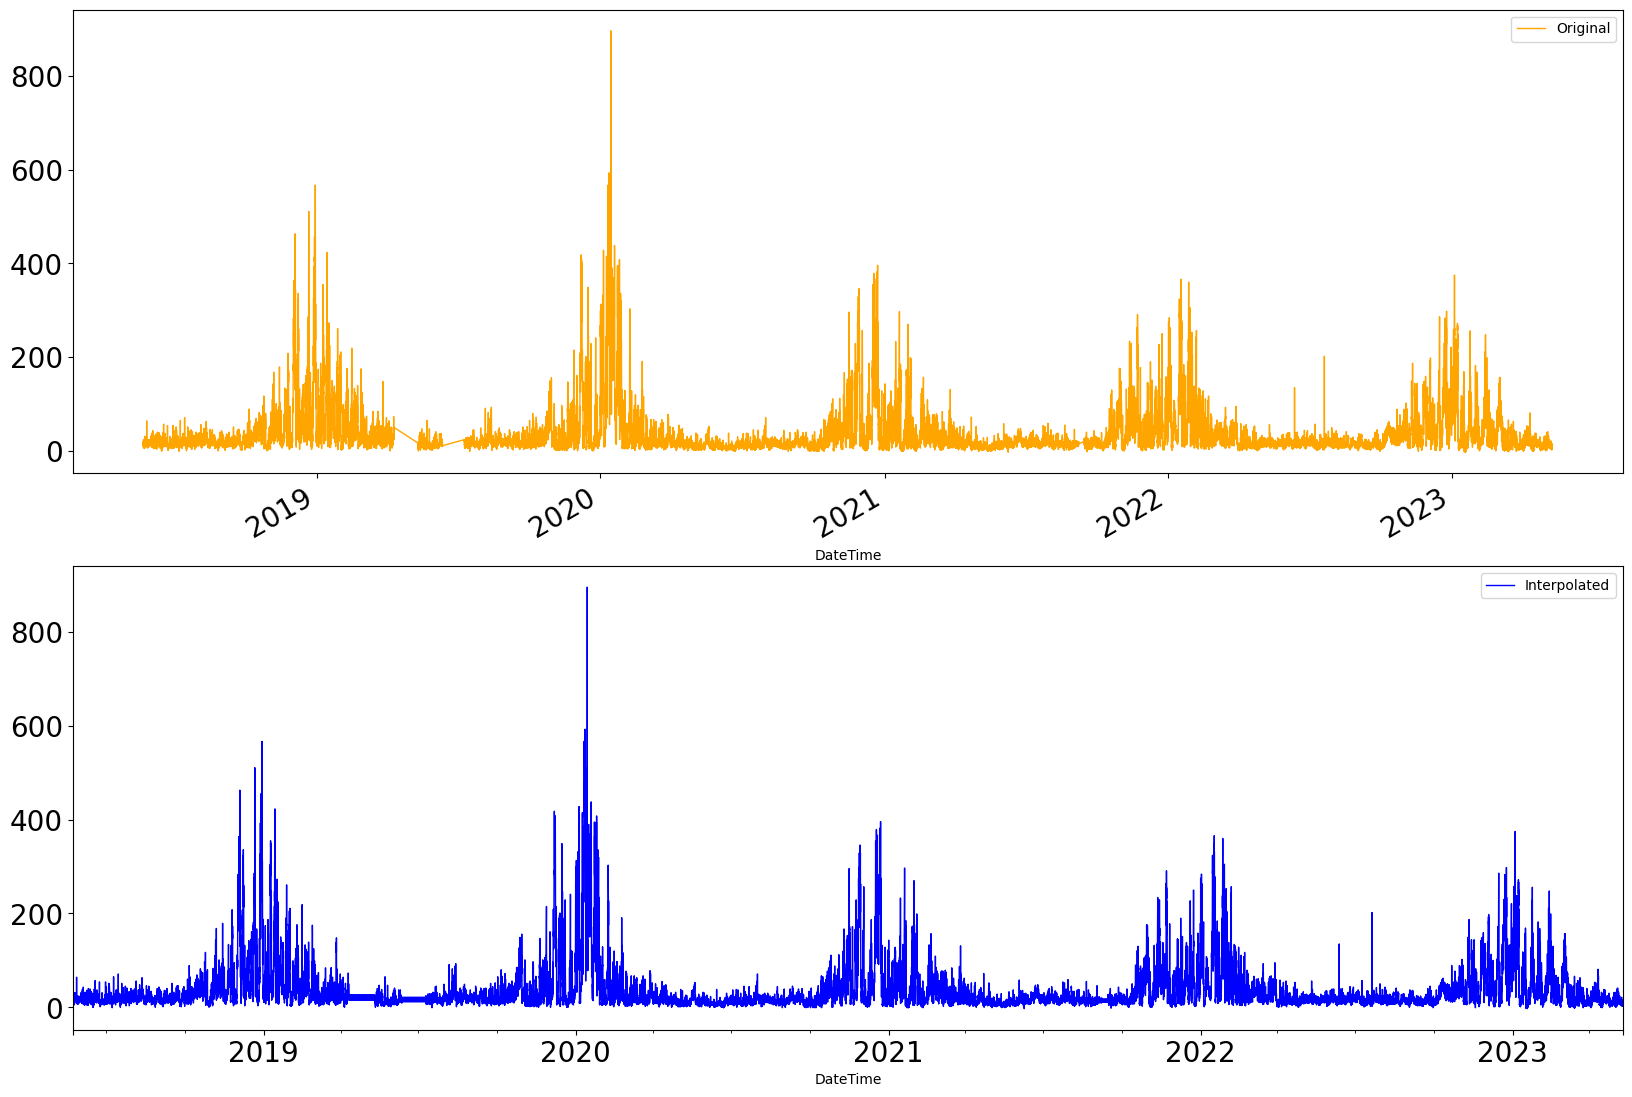

In [14]:
plot_original_and_interpolated_data(df_raw_conc_hourly_neighbors_copy, df_raw_conc_hourly_neighbors, 'RawConc')

In [46]:
df_raw_conc_daily_neighbors = resample_data_to_daily(df_raw_conc_copy.copy())
df_raw_conc_daily_neighbors_copy = df_raw_conc_daily_neighbors.copy()
print("Missing dates in RawConc daily: ", check_missing_dates(df_raw_conc_daily_neighbors))
print("Number of nan values in RawConc daily: ", df_raw_conc_daily_neighbors['RawConc'].isnull().sum())
df_raw_conc_daily_neighbors = fill_missing_days_with_neighbors(df_raw_conc_daily_neighbors, 'RawConc')
print("Number of nan values in RawConc daily after filling with neighbors: ", df_raw_conc_daily_neighbors['RawConc'].isnull().sum())

Missing dates in RawConc daily:  0
Number of nan values in RawConc daily:  63
Filling missing values between 2019-04-11 00:00:00 and 2019-05-10 00:00:00 = number of missing days: 30
Filling missing values between 2019-06-12 00:00:00 and 2019-07-08 00:00:00 = number of missing days: 27
Filling missing values between 2021-09-08 00:00:00 and 2021-09-13 00:00:00 = number of missing days: 6
Number of nan values in RawConc daily after filling with neighbors:  0


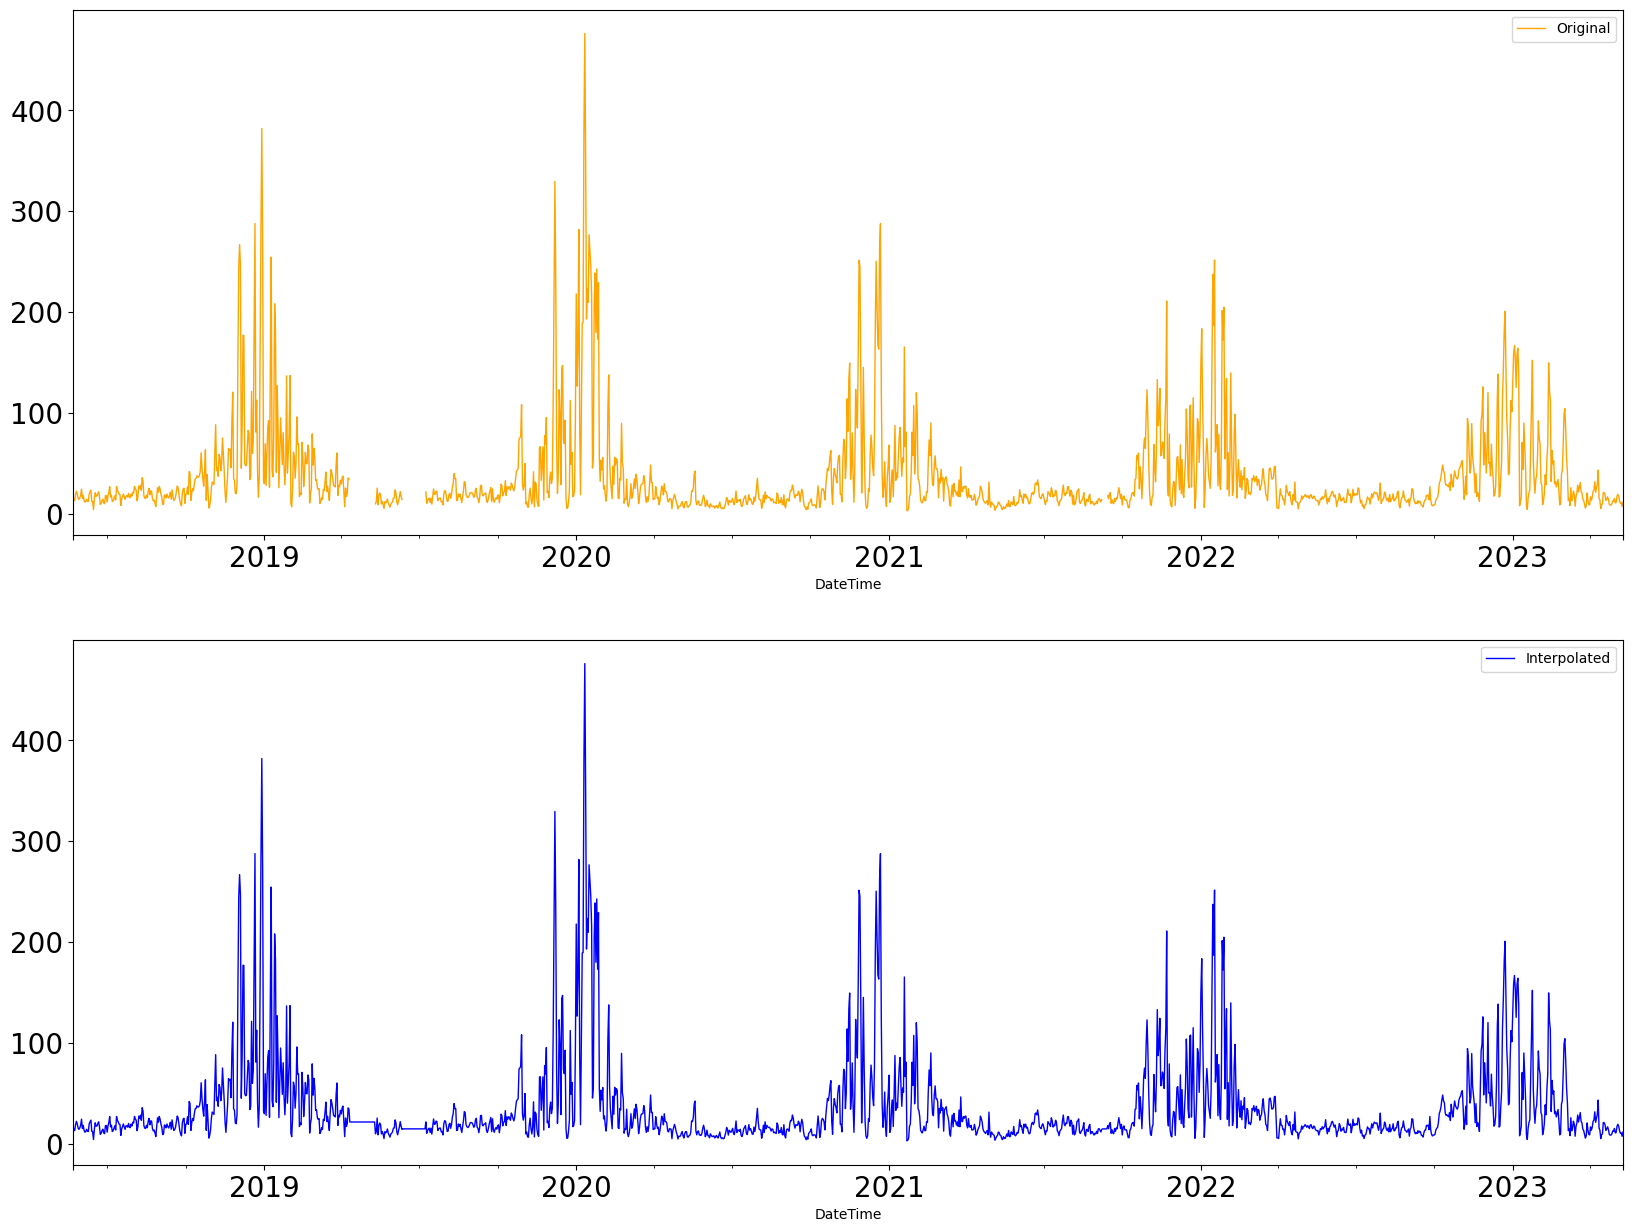

In [47]:
plot_original_and_interpolated_data(df_raw_conc_daily_neighbors_copy, df_raw_conc_daily_neighbors, 'RawConc')

In [48]:
df_raw_conc_hourly_neighbors.to_csv('Dataset/dataset_raw_conc_hourly_filled_with_neighbors.csv', index=False)
df_raw_conc_daily_neighbors.to_csv('Dataset/dataset_raw_conc_daily_filled_with_neighbors.csv', index=False)

### Showing datasets info after

In [64]:
print("Air quality hourly info: ")
print(df_aqi.info())
print("Air quality daily info: ")
print(df_aqi_daily.info())
print("Raw concentration hourly info: ")
print(df_raw_conc.info())
print("Raw concentration daily info: ")
print(df_raw_conc_daily.info())



Air quality hourly info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43521 entries, 0 to 43520
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  43521 non-null  datetime64[ns]
 1   AQI       43521 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 680.1 KB
None
Air quality daily info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1815 non-null   datetime64[ns]
 1   AQI       1815 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.5 KB
None
Raw concentration hourly info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43521 entries, 0 to 43520
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0  

In [2]:
df_aqi_neighbors = pd.read_csv('Dataset/dataset_aqi_hourly_filled_with_neighbors.csv')